In [1]:
import numpy as np
from scipy.io import loadmat
import pandas as pd
import re
import glob

In [2]:
path='../data_model/40'
case='40'

In [3]:
# from scipy import interpolate
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager
from matplotlib.ticker import MaxNLocator
# from matplotlib.ticker import FormatStrFormatter
# from mpl_toolkits.axes_grid1 import make_axes_locatable
mpl.rcParams.update(mpl.rcParamsDefault)

In [4]:
mss=50
fontssize=50
mpl.rcParams.update({
    'figure.figsize': (23.6,12.6),
    'font.family': 'serif',
    'font.serif': ['Liberation Sans'],  # Add or remove font names as needed
    #'font.sans-serif':['Helvetica'],
    'font.size': fontssize,  # Adjust as needed
    #'font.weight': 'bold',
    "svg.fonttype": 'none',
    'text.usetex': False,
    'axes.linewidth' : 2,
    #'axes.labelweight': 'bold',
    'text.latex.preamble': r'\usepackage{amsmath} \usepackage{amsfonts} \usepackage{cmbright}',
    'xtick.labelsize' : fontssize, # fontsize of the x tick labels
    'ytick.labelsize' : fontssize, # fontsize of the y tick labels
})
ticks_font = font_manager.FontProperties(family='Liberation Sans', style='normal',
    size=fontssize, weight='bold', stretch='normal')


In [5]:
NAMES = loadmat(path+'/NAMES.mat')['NAMES']
sample_nums_ca = [4, 6, 8, 10, 12, 14, 16]; 
sample_nums_sub = [4, 6, 8, 10, 12, 14, 16, 19];

pts = lambda x,y,id: {'loc':id,'sample_nums':x,'mean': np.mean(y), 'std': np.std(y),'val':y}

In [6]:
def procs(res_name,df_name):
    # Create a case-insensitive regex pattern for the desired file name
    pattern = re.compile(re.escape(df_name) + r'\.mat$', re.IGNORECASE)

    # Use glob to find all .mat files in the directory
    search_pattern = res_name + '/*.mat'
    matched_file = None

    # Find the file that matches the desired name (case-insensitive)
    for file in glob.glob(search_pattern):
        if pattern.search(file):
            matched_file = file
            break

    if matched_file is None:
        raise FileNotFoundError(f"No file matching '{df_name}.mat' found in directory '{res_name}'")

    # Load the .mat file and retrieve the data
    tmp = loadmat(matched_file)[re.split(r'[/.]', matched_file)[-2]]
    df=pd.DataFrame()
    
    df=pd.concat([df,pd.DataFrame([pts(sample_nums_ca[i],tmp[0,0][0,i][0],'CA1') for i in range(7)])],ignore_index=True)
    df=pd.concat([df,pd.DataFrame([pts(sample_nums_sub[i],tmp[0,1][0,i][0],'SUB') for i in range(8)])],ignore_index=True)
    
    return df

In [7]:
df_H_IND = procs(path,'RESULTS_H_IND_ALL')
df_H_CDM = procs(path,'RESULTS_H_CDM_ALL')

df_H_CDM_UP = procs(path,'RESULTS_H_CDM_ALL_UP')
df_H_CDM_DOWN = procs(path,'RESULTS_H_CDM_ALL_DOWN')

In [8]:
df = pd.DataFrame([],columns=['loc','sample_nums','mean','upL','dwL','Nmean','NupL','NdwL'])

# For CA1 Neurons
for i in df_H_IND.query('loc=="CA1"')['sample_nums'].values:
    row={
            'loc':'CA1',
             'sample_nums':i,
             'mean': np.mean(df_H_IND.query('sample_nums == '+str(i)+' and loc == "CA1"')['val'].values[0] -  df_H_CDM.query('sample_nums == '+str(i)+' and loc == "CA1"')['val'].values[0]),
             'upL': np.mean(df_H_IND.query('sample_nums == '+str(i)+' and loc == "CA1"')['val'].values[0] -df_H_CDM_UP.query('sample_nums == '+str(i)+' and loc == "CA1"')['val'].values[0]),
             'dwL': np.mean(df_H_IND.query('sample_nums == '+str(i)+' and loc == "CA1"')['val'].values[0] -df_H_CDM_DOWN.query('sample_nums == '+str(i)+' and loc == "CA1"')['val'].values[0]),
             
             'Nmean': np.mean((df_H_IND.query('sample_nums == '+str(i)+' and loc == "CA1"')['val'].values[0] -  df_H_CDM.query('sample_nums == '+str(i)+' and loc == "CA1"')['val'].values[0])      /(df_H_CDM.query('sample_nums == '+str(i)+' and loc == "CA1"')['val'].values[0])),
             
             'NupL': np.mean((df_H_IND.query('sample_nums == '+str(i)+' and loc == "CA1"')['val'].values[0] -df_H_CDM_UP.query('sample_nums == '+str(i)+' and loc == "CA1"')['val'].values[0]) /(df_H_CDM.query('sample_nums == '+str(i)+' and loc == "CA1"')['val'].values[0])),
             
             'NdwL': np.mean((df_H_IND.query('sample_nums == '+str(i)+' and loc == "CA1"')['val'].values[0] -df_H_CDM_DOWN.query('sample_nums == '+str(i)+' and loc == "CA1"')['val'].values[0]) /(df_H_CDM.query('sample_nums == '+str(i)+' and loc == "CA1"')['val'].values[0]))
    }
    df=pd.concat([df if not df.empty else None,pd.DataFrame([row])],ignore_index=True)
#For SUB Neurons
for i in df_H_IND.query('loc=="SUB"')['sample_nums'].values:
    row={
            'loc':'SUB',
            'sample_nums':i,
            'mean': np.mean(df_H_IND.query('sample_nums == '+str(i)+' and loc == "SUB"')['val'].values[0] -  df_H_CDM.query('sample_nums == '+str(i)+' and loc == "SUB"')['val'].values[0]),
            'upL': np.mean(df_H_IND.query('sample_nums == '+str(i)+' and loc == "SUB"')['val'].values[0] -df_H_CDM_UP.query('sample_nums == '+str(i)+' and loc == "SUB"')['val'].values[0]),
            'dwL': np.mean(df_H_IND.query('sample_nums == '+str(i)+' and loc == "SUB"')['val'].values[0] -df_H_CDM_DOWN.query('sample_nums == '+str(i)+' and loc == "SUB"')['val'].values[0]),
            
            'Nmean': np.mean((df_H_IND.query('sample_nums == '+str(i)+' and loc == "SUB"')['val'].values[0] -  df_H_CDM.query('sample_nums == '+str(i)+' and loc == "SUB"')['val'].values[0]) /(df_H_CDM.query('sample_nums == '+str(i)+' and loc == "SUB"')['val'].values[0])),
            
            'NupL': np.mean((df_H_IND.query('sample_nums == '+str(i)+' and loc == "SUB"')['val'].values[0] -df_H_CDM_UP.query('sample_nums == '+str(i)+' and loc == "SUB"')['val'].values[0]) /(df_H_CDM.query('sample_nums == '+str(i)+' and loc == "SUB"')['val'].values[0])),
            
            'NdwL': np.mean((df_H_IND.query('sample_nums == '+str(i)+' and loc == "SUB"')['val'].values[0] -df_H_CDM_DOWN.query('sample_nums == '+str(i)+' and loc == "SUB"')['val'].values[0]) /(df_H_CDM.query('sample_nums == '+str(i)+' and loc == "SUB"')['val'].values[0]))
    }
    df=pd.concat([df if not df.empty else None,pd.DataFrame([row])],ignore_index=True)

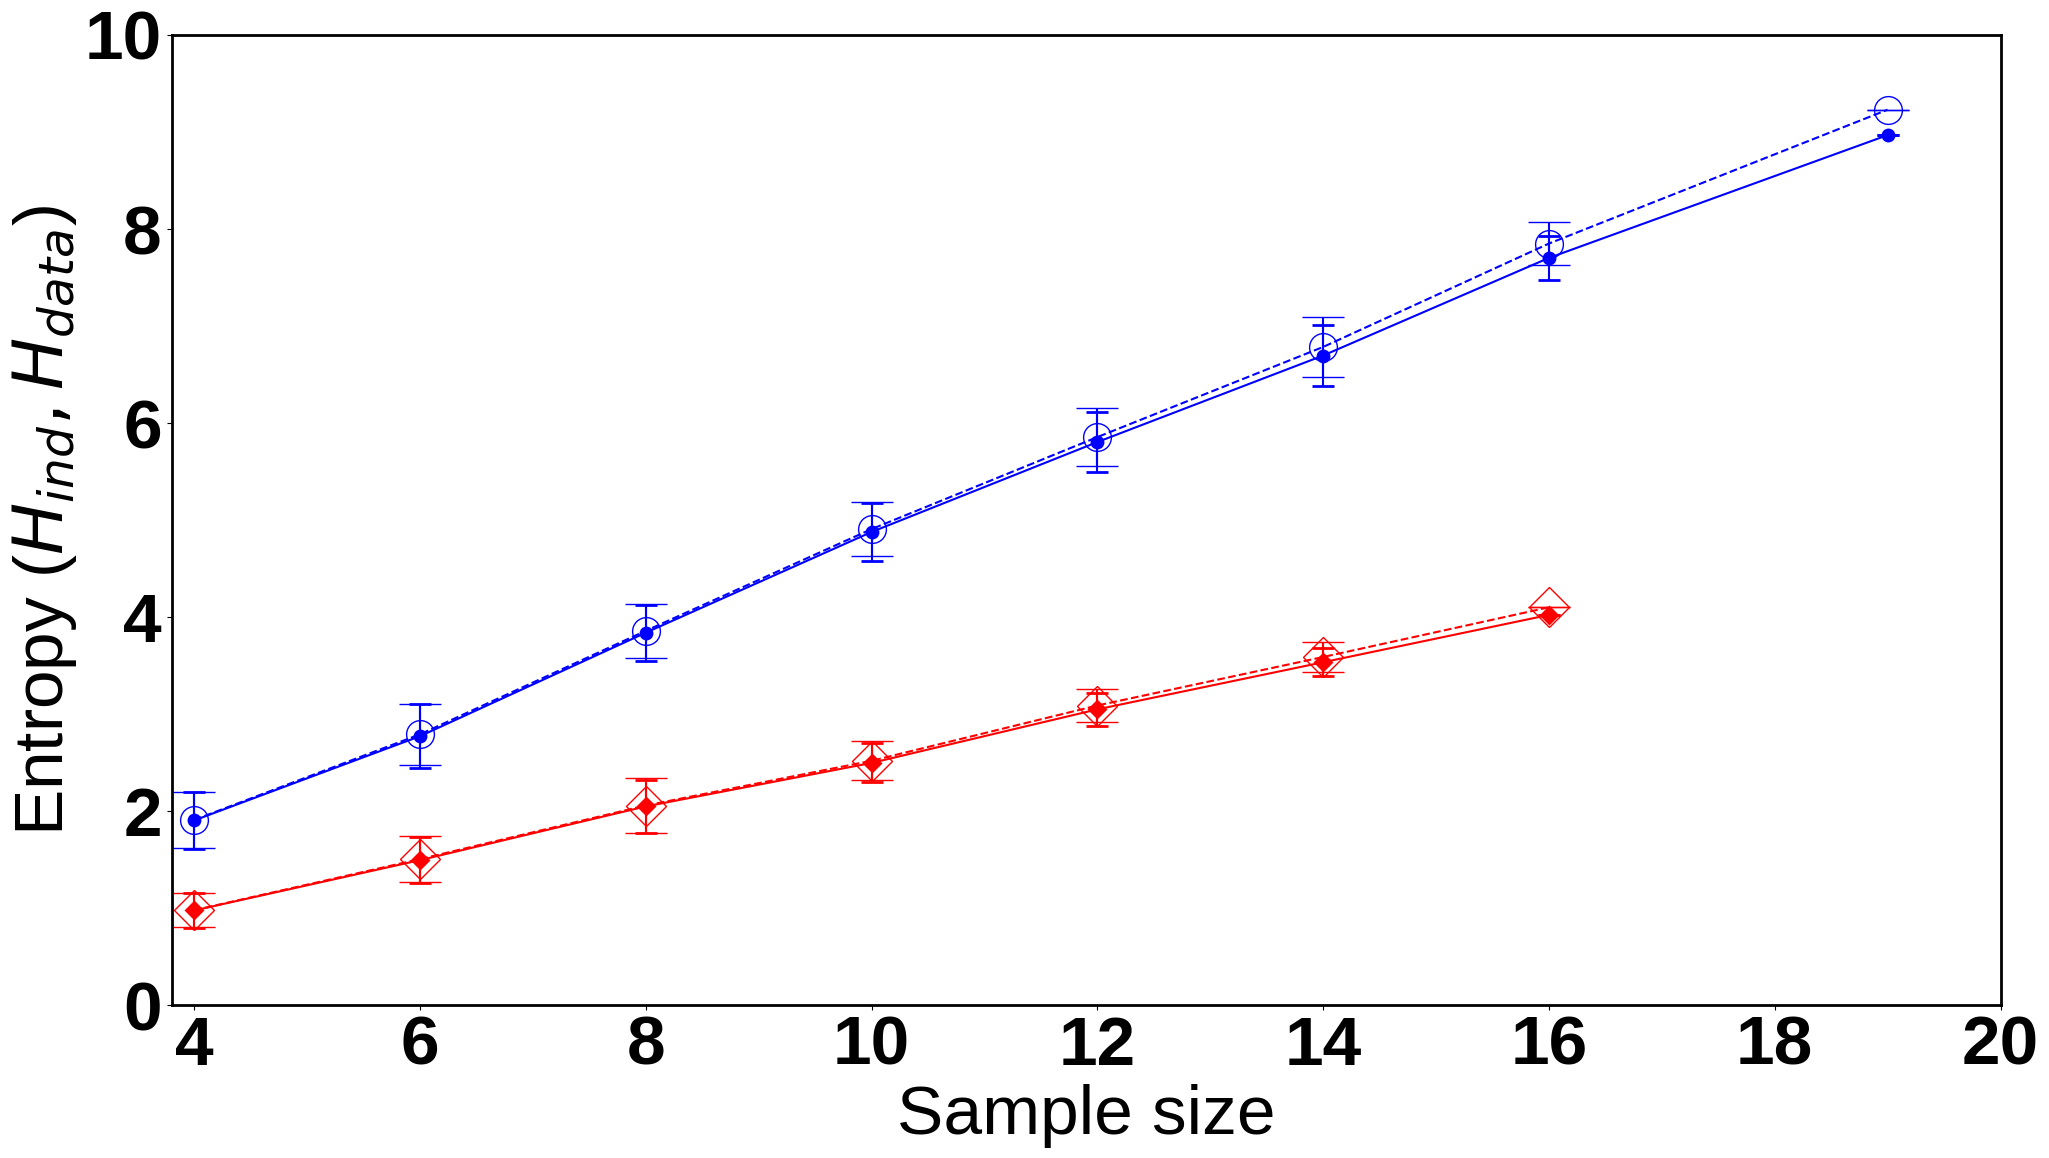

In [9]:
fig, ax = plt.subplots()
figname='../figures/IND-DATA-entopy_'+str(case)+'ms.pdf'


clr='r'
ax.errorbar(x=df_H_IND.query('loc=="CA1"')['sample_nums'],
            y=df_H_IND.query('loc=="CA1"')['mean'], yerr=df_H_IND.query('loc=="CA1"')['std'],
            label='H-IND-CA1', marker='D', mfc='none',mec='r',ms=mss-30,c=clr,ls='--',
            capsize=15, capthick=1)

ax.errorbar(x=df_H_CDM.query('loc=="CA1"')['sample_nums'],
            y=df_H_CDM.query('loc=="CA1"')['mean'], yerr=df_H_CDM.query('loc=="CA1"')['std'],
            label='H-data-CA1', marker='D', mfc='r',mec='none',ms=mss-40,c=clr,
            capsize=8, capthick=2)
clr='b'
ax.errorbar(x=df_H_IND.query('loc=="SUB"')['sample_nums'],
            y=df_H_IND.query('loc=="SUB"')['mean'],yerr=df_H_IND.query('loc=="SUB"')['std'], label='H-IND-SUB', marker='o', mfc='none',mec='b',ms=mss-30,c=clr,ls='--',
            capsize=15, capthick=1)

ax.errorbar(x=df_H_CDM.query('loc=="SUB"')['sample_nums'],
            y=df_H_CDM.query('loc=="SUB"')['mean'],yerr=df_H_CDM.query('loc=="SUB"')['std'], label='H-CDM-SUB', marker='o', mfc='b',mec='none',ms=mss-40,c=clr,
            capsize=8, capthick=2)

for tick in ax.get_xticklabels():
    tick.set_fontproperties(ticks_font)
for tick in ax.get_yticklabels():
    tick.set_fontproperties(ticks_font)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
# ax.set_ylim(-0.1,4)

## for case 40ms
ax.set_ylim(0,10)

ax.set_xlim(3.8,20)
# ax.tick_params(axis='y',labelcolor=clr)
# ax.yaxis.label.set_color(clr)
ax.set_xlabel("Sample size", fontsize=fontssize)
ax.set_ylabel(r"Entropy ($H_{ind},H_{data}$)",fontsize=fontssize)  




# ax_twin = ax.twinx()
# clr='b'
# ax_twin.errorbar(x=df_H_IND.query('loc=="SUB"')['sample_nums'],
#             y=df_H_IND.query('loc=="SUB"')['mean'],yerr=df_H_IND.query('loc=="SUB"')['std'], label='H-IND-SUB', marker='o', mfc='none',mec='b',ms=mss-30,c=clr,ls='--',
#             capsize=15, capthick=1)

# ax_twin.errorbar(x=df_H_CDM.query('loc=="SUB"')['sample_nums'],
#             y=df_H_CDM.query('loc=="SUB"')['mean'],yerr=df_H_CDM.query('loc=="SUB"')['std'], label='H-CDM-SUB', marker='o', mfc='b',mec='none',ms=mss-40,c=clr,
#             capsize=8, capthick=2)
# ax_twin.tick_params(axis='y',labelcolor=clr)  
# ax_twin.set_ylim(-0.1,4)
# ax_twin.yaxis.label.set_color(clr)
# ax_twin.set_ylabel(r"Entropy ($H^{SUB}_{ind}, H^{SUB}_{data})$",fontsize=fontssize)  # Adjusted Y-axis label

# for tick in ax_twin.get_yticklabels():
#     tick.set_fontproperties(ticks_font)



# # Add legend to the scatter plot outside, on the top, with horizontal layout and single column
# ax.legend(loc='upper center', bbox_to_anchor=(0.31, 1.12), ncol=4,fontsize=22)
# ax_twin.legend(loc='upper center', bbox_to_anchor=(0.71, 1.12), ncol=4,fontsize=22)

fig.savefig(figname,bbox_inches='tight',dpi=300)
plt.show()

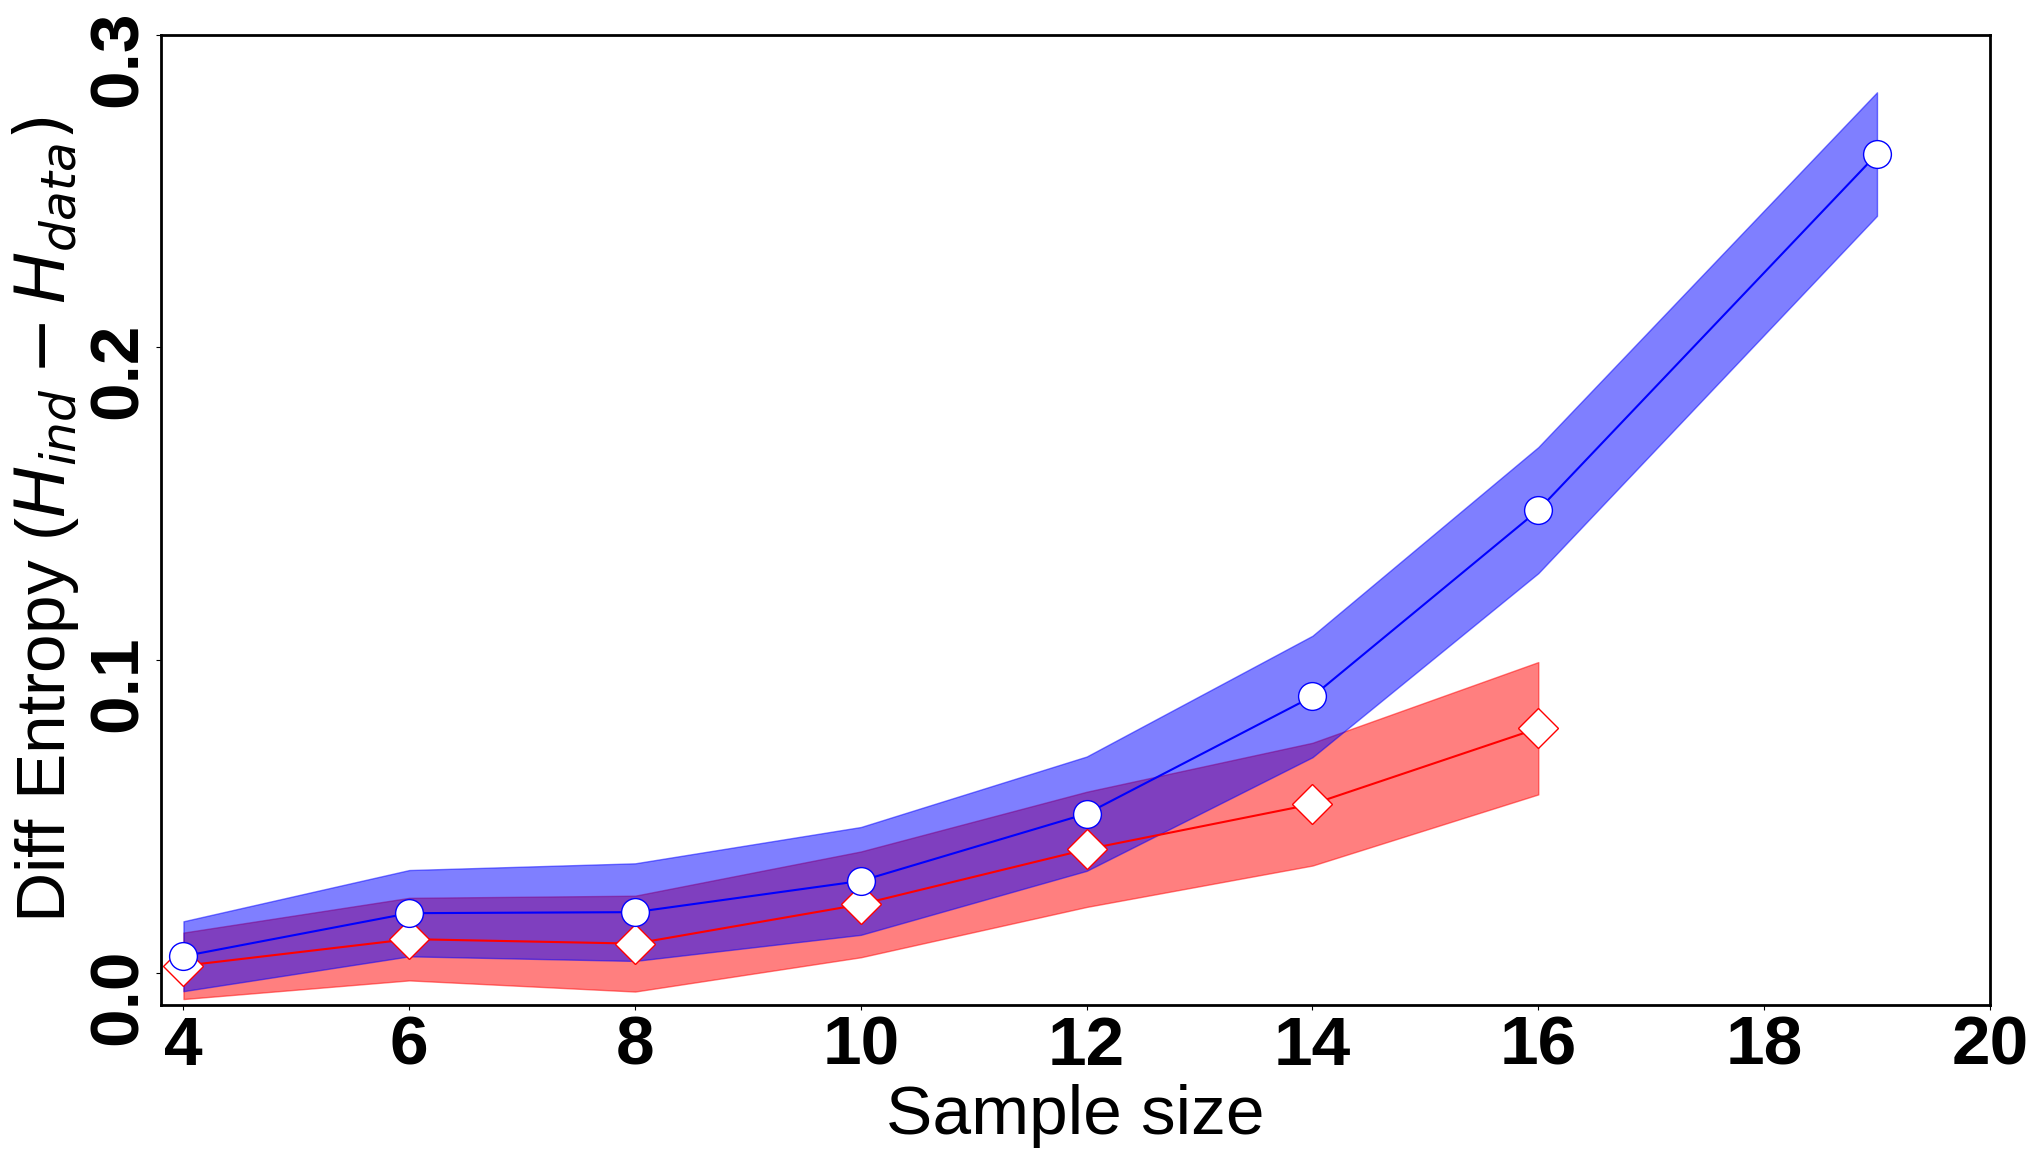

In [10]:
fig, ax = plt.subplots()
figname='../figures/IND-DATA-diff_entopy_'+str(case)+'ms.pdf'


clr='r'
ax.plot(df.query('loc=="CA1"')['sample_nums'],df.query('loc=="CA1"')['mean'],
           label='CA1', marker="D", mfc='white',mec='r',ms=mss-30,c=clr)
ax.fill_between(df.query('loc=="CA1"')['sample_nums'], df.query('loc=="CA1"')['upL'], df.query('loc=="CA1"')['dwL'], alpha=0.5,color=clr)

clr='b'
ax.plot(df.query('loc=="SUB"')['sample_nums'],df.query('loc=="SUB"')['mean'], 
                label='SUB',marker='o',mfc='white',mec='b',ms=mss-30,c=clr)
ax.fill_between(df.query('loc=="SUB"')['sample_nums'], df.query('loc=="SUB"')['upL'], df.query('loc=="SUB"')['dwL'], alpha=0.5,color=clr)




ax.xaxis.set_major_locator(MaxNLocator(integer=True))
#ax.set_ylim(-0.01,0.062)
# ax.set_ylim(-0.015,0.062)

## for case 40ms
ax.set_ylim(-0.01,0.3)


ax.set_xlim(3.8,20)

ax.tick_params(axis='y',rotation=90,)
               #labelcolor=clr)
# ax.yaxis.label.set_color(clr)
ax.set_xlabel("Sample size", fontsize=fontssize)
ax.set_ylabel("Diff Entropy"+r" ($H_{ind} - H_{data})$",fontsize=fontssize, labelpad=30, ha='center', va='center')  # Adjusted Y-axis label

for tick in ax.get_xticklabels():
    tick.set_fontproperties(ticks_font)
for tick in ax.get_yticklabels():
    tick.set_fontproperties(ticks_font)

# ax_twin = ax.twinx()
# clr='b'
# ax_twin.plot(df.query('loc=="SUB"')['sample_nums'],df.query('loc=="SUB"')['mean'], 
#                 label='SUB',marker='o',mfc='white',mec='b',ms=mss-30,c=clr)
# ax_twin.fill_between(df.query('loc=="SUB"')['sample_nums'], df.query('loc=="SUB"')['upL'], df.query('loc=="SUB"')['dwL'], alpha=0.5,color=clr)

# ax_twin.tick_params(axis='y',labelcolor=clr)  
# ax_twin.set_ylim(-0.01,0.062)
# ax_twin.yaxis.label.set_color(clr)
# ax_twin.set_ylabel("Diff Entropy SUB\n"+ r"($H^{SUB}_{ind} - H^{SUB}_{data})$",fontsize=fontssize,labelpad=70, ha='center', va='center')  # Adjusted Y-axis label

# for tick in ax_twin.get_yticklabels():
#     tick.set_fontproperties(ticks_font)



# # Add legend to the scatter plot outside, on the top, with horizontal layout and single column
# ax.legend(loc='upper center', bbox_to_anchor=(0.31, 1.12), ncol=4,fontsize=22)
# ax_twin.legend(loc='upper center', bbox_to_anchor=(0.71, 1.12), ncol=4,fontsize=22)

fig.savefig(figname,bbox_inches='tight',dpi=300)
plt.show()

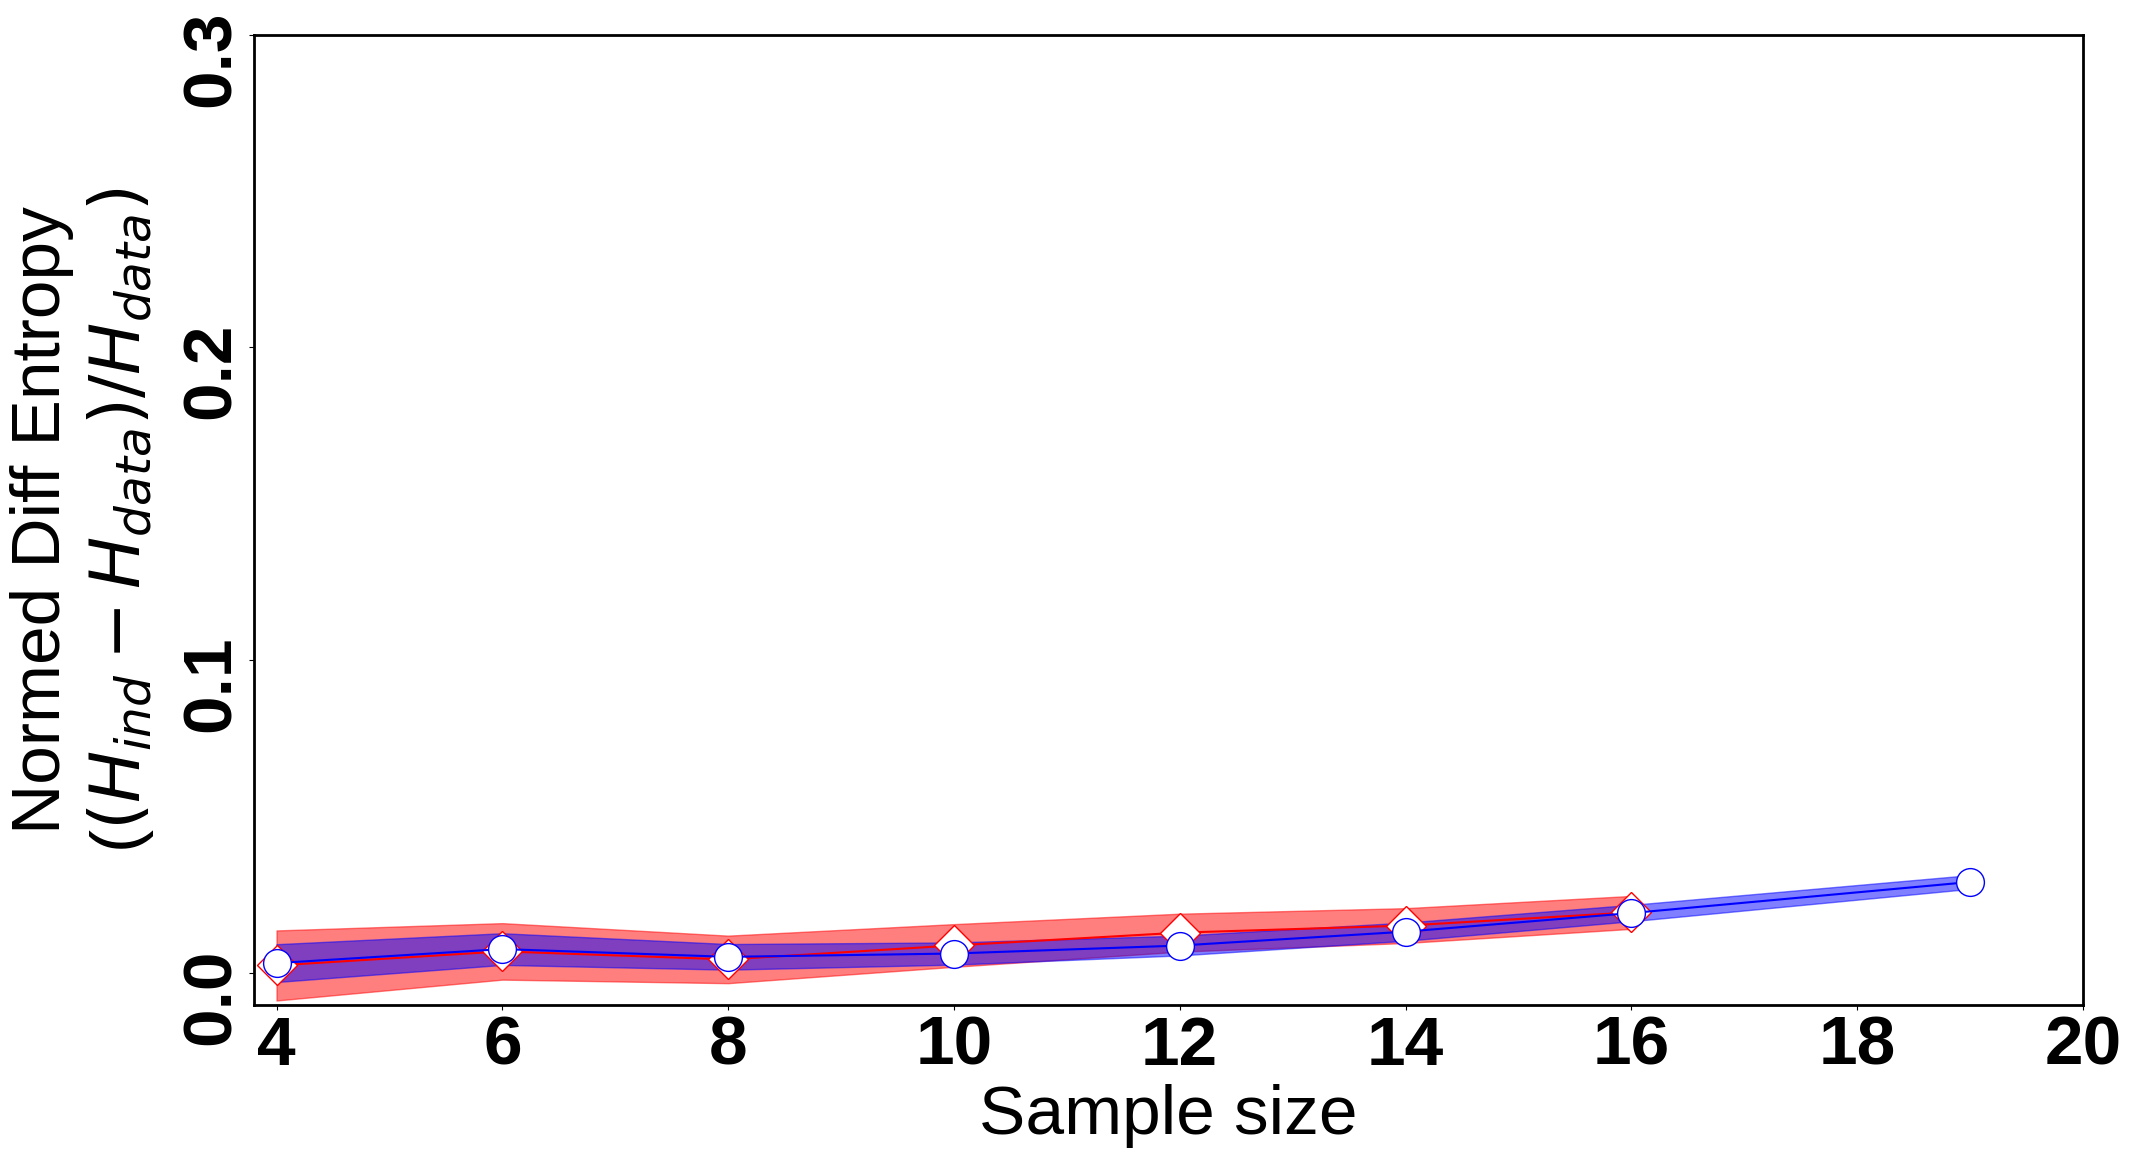

In [11]:
fig, ax = plt.subplots()
figname='../figures/IND-DATA-diffnorm_entopy_'+str(case)+'ms.pdf'


clr='r'
ax.plot(df.query('loc=="CA1"')['sample_nums'],df.query('loc=="CA1"')['Nmean'],
           label='CA1', marker="D", mfc='white',mec='r',ms=mss-30,c=clr)
ax.fill_between(df.query('loc=="CA1"')['sample_nums'], df.query('loc=="CA1"')['NupL'], df.query('loc=="CA1"')['NdwL'], alpha=0.5,color=clr)


clr='b'
ax.plot(df.query('loc=="SUB"')['sample_nums'],df.query('loc=="SUB"')['Nmean'], 
                label='SUB',marker='o',mfc='white',mec='b',ms=mss-30,c=clr)
ax.fill_between(df.query('loc=="SUB"')['sample_nums'], df.query('loc=="SUB"')['NupL'], df.query('loc=="SUB"')['NdwL'], alpha=0.5,color=clr)



for tick in ax.get_xticklabels():
    tick.set_fontproperties(ticks_font)
for tick in ax.get_yticklabels():
    tick.set_fontproperties(ticks_font)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
#ax.set_ylim(-0.015,0.02)
ax.set_ylim(-0.015,0.062)

##For case 40ms
ax.set_ylim(-0.01,0.3)


ax.set_xlim(3.8,20)

ax.tick_params(axis='y',rotation=90,)   
               #labelcolor=clr)
# ax.yaxis.label.set_color(clr)
ax.set_xlabel("Sample size", fontsize=fontssize)
ax.set_ylabel("Normed Diff Entropy\n"+ r"($(H_{ind} - H_{data})/H_{data})$",fontsize=fontssize,labelpad=70, ha='center', va='center')  # Adjusted Y-axis label


# ax_twin = ax.twinx()
# clr='b'
# ax_twin.plot(df.query('loc=="SUB"')['sample_nums'],df.query('loc=="SUB"')['Nmean'], 
#                 label='SUB',marker='o',mfc='white',mec='b',ms=mss-30,c=clr)
# ax_twin.fill_between(df.query('loc=="SUB"')['sample_nums'], df.query('loc=="SUB"')['NupL'], df.query('loc=="SUB"')['NdwL'], alpha=0.5,color=clr)

# ax_twin.tick_params(axis='y',labelcolor=clr)  
# ax_twin.set_ylim(-0.015,0.02)
# ax_twin.yaxis.label.set_color(clr)
# ax_twin.set_ylabel("Normed Diff Entropy SUB\n"+ r"($H^{SUB}_{ind} - H^{SUB}_{data}/H^{SUB}_{data})$",fontsize=fontssize,labelpad=70, ha='center', va='center')  # Adjusted Y-axis label

# for tick in ax_twin.get_yticklabels():
#     tick.set_fontproperties(ticks_font)



# # Add legend to the scatter plot outside, on the top, with horizontal layout and single column
# ax.legend(loc='upper center', bbox_to_anchor=(0.31, 1.12), ncol=4,fontsize=22)
# ax_twin.legend(loc='upper center', bbox_to_anchor=(0.71, 1.12), ncol=4,fontsize=22)

fig.savefig(figname,bbox_inches='tight',dpi=300)
plt.show()

## Pair

In [12]:
df_H_PAIR = procs(path,'RESULTS_H_PAIR_ALL')
df_H_CDM = procs(path,'RESULTS_H_CDM_ALL')

df_H_CDM_UP = procs(path,'RESULTS_H_CDM_ALL_UP')
df_H_CDM_DOWN = procs(path,'RESULTS_H_CDM_ALL_DOWN')

In [13]:
df = pd.DataFrame([],columns=['loc','sample_nums','mean','upL','dwL','Nmean','NupL','NdwL'])

# For CA1 Neurons
for i in df_H_PAIR.query('loc=="CA1"')['sample_nums'].values:
    row={
            'loc':'CA1',
             'sample_nums':i,
             'mean': np.mean(df_H_PAIR.query('sample_nums == '+str(i)+' and loc == "CA1"')['val'].values[0] -  df_H_CDM.query('sample_nums == '+str(i)+' and loc == "CA1"')['val'].values[0]),
             'upL': np.mean(df_H_PAIR.query('sample_nums == '+str(i)+' and loc == "CA1"')['val'].values[0] -df_H_CDM_UP.query('sample_nums == '+str(i)+' and loc == "CA1"')['val'].values[0]),
             'dwL': np.mean(df_H_PAIR.query('sample_nums == '+str(i)+' and loc == "CA1"')['val'].values[0] -df_H_CDM_DOWN.query('sample_nums == '+str(i)+' and loc == "CA1"')['val'].values[0]),
             
             'Nmean': np.mean((df_H_PAIR.query('sample_nums == '+str(i)+' and loc == "CA1"')['val'].values[0] -  df_H_CDM.query('sample_nums == '+str(i)+' and loc == "CA1"')['val'].values[0])      /(df_H_CDM.query('sample_nums == '+str(i)+' and loc == "CA1"')['val'].values[0])),
             
             'NupL': np.mean((df_H_PAIR.query('sample_nums == '+str(i)+' and loc == "CA1"')['val'].values[0] -df_H_CDM_UP.query('sample_nums == '+str(i)+' and loc == "CA1"')['val'].values[0]) /(df_H_CDM.query('sample_nums == '+str(i)+' and loc == "CA1"')['val'].values[0])),
             
             'NdwL': np.mean((df_H_PAIR.query('sample_nums == '+str(i)+' and loc == "CA1"')['val'].values[0] -df_H_CDM_DOWN.query('sample_nums == '+str(i)+' and loc == "CA1"')['val'].values[0]) /(df_H_CDM.query('sample_nums == '+str(i)+' and loc == "CA1"')['val'].values[0]))
    }
    df=pd.concat([df if not df.empty else None,pd.DataFrame([row])],ignore_index=True)
#For SUB Neurons
for i in df_H_PAIR.query('loc=="SUB"')['sample_nums'].values:
    row={
            'loc':'SUB',
            'sample_nums':i,
            'mean': np.mean(df_H_PAIR.query('sample_nums == '+str(i)+' and loc == "SUB"')['val'].values[0] -  df_H_CDM.query('sample_nums == '+str(i)+' and loc == "SUB"')['val'].values[0]),
            'upL': np.mean(df_H_PAIR.query('sample_nums == '+str(i)+' and loc == "SUB"')['val'].values[0] -df_H_CDM_UP.query('sample_nums == '+str(i)+' and loc == "SUB"')['val'].values[0]),
            'dwL': np.mean(df_H_PAIR.query('sample_nums == '+str(i)+' and loc == "SUB"')['val'].values[0] -df_H_CDM_DOWN.query('sample_nums == '+str(i)+' and loc == "SUB"')['val'].values[0]),
            
            'Nmean': np.mean((df_H_PAIR.query('sample_nums == '+str(i)+' and loc == "SUB"')['val'].values[0] -  df_H_CDM.query('sample_nums == '+str(i)+' and loc == "SUB"')['val'].values[0]) /(df_H_CDM.query('sample_nums == '+str(i)+' and loc == "SUB"')['val'].values[0])),
            
            'NupL': np.mean((df_H_PAIR.query('sample_nums == '+str(i)+' and loc == "SUB"')['val'].values[0] -df_H_CDM_UP.query('sample_nums == '+str(i)+' and loc == "SUB"')['val'].values[0]) /(df_H_CDM.query('sample_nums == '+str(i)+' and loc == "SUB"')['val'].values[0])),
            
            'NdwL': np.mean((df_H_PAIR.query('sample_nums == '+str(i)+' and loc == "SUB"')['val'].values[0] -df_H_CDM_DOWN.query('sample_nums == '+str(i)+' and loc == "SUB"')['val'].values[0]) /(df_H_CDM.query('sample_nums == '+str(i)+' and loc == "SUB"')['val'].values[0]))
    }
    df=pd.concat([df if not df.empty else None,pd.DataFrame([row])],ignore_index=True)

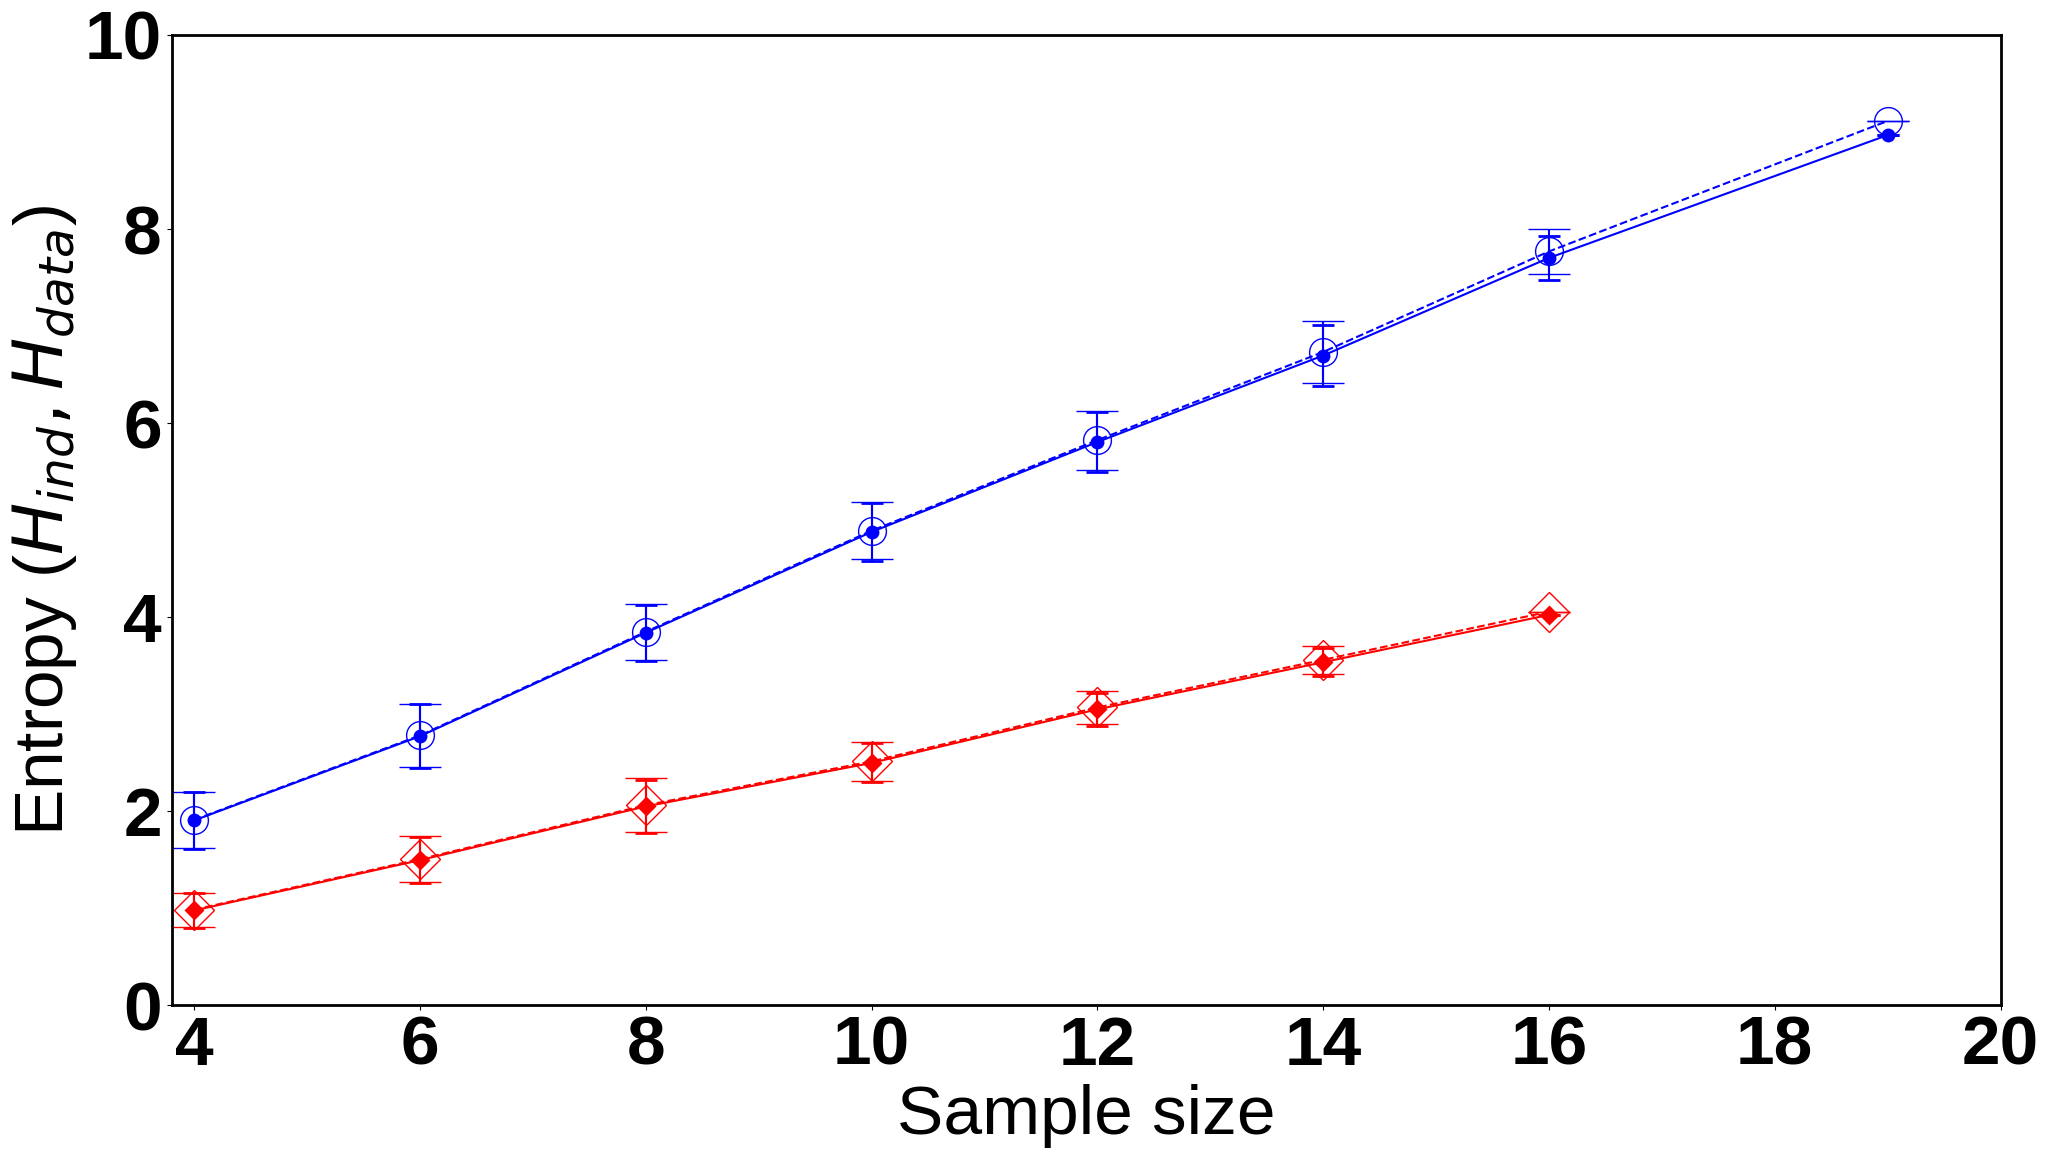

In [14]:
fig, ax = plt.subplots()
figname='../figures/PAIR-DATA-entopy_'+str(case)+'ms.pdf'


clr='r'
ax.errorbar(x=df_H_PAIR.query('loc=="CA1"')['sample_nums'],
            y=df_H_PAIR.query('loc=="CA1"')['mean'], yerr=df_H_PAIR.query('loc=="CA1"')['std'],
            label='H-IND-CA1', marker='D', mfc='none',mec='r',ms=mss-30,c=clr,ls='--',
            capsize=15, capthick=1)

ax.errorbar(x=df_H_CDM.query('loc=="CA1"')['sample_nums'],
            y=df_H_CDM.query('loc=="CA1"')['mean'], yerr=df_H_CDM.query('loc=="CA1"')['std'],
            label='H-data-CA1', marker='D', mfc='r',mec='none',ms=mss-40,c=clr,
            capsize=8, capthick=2)
clr='b'
ax.errorbar(x=df_H_PAIR.query('loc=="SUB"')['sample_nums'],
            y=df_H_PAIR.query('loc=="SUB"')['mean'],yerr=df_H_PAIR.query('loc=="SUB"')['std'], label='H-IND-SUB', marker='o', mfc='none',mec='b',ms=mss-30,c=clr,ls='--',
            capsize=15, capthick=1)

ax.errorbar(x=df_H_CDM.query('loc=="SUB"')['sample_nums'],
            y=df_H_CDM.query('loc=="SUB"')['mean'],yerr=df_H_CDM.query('loc=="SUB"')['std'], label='H-CDM-SUB', marker='o', mfc='b',mec='none',ms=mss-40,c=clr,
            capsize=8, capthick=2)

for tick in ax.get_xticklabels():
    tick.set_fontproperties(ticks_font)
for tick in ax.get_yticklabels():
    tick.set_fontproperties(ticks_font)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_ylim(-0.1,4)

## for case 40ms
ax.set_ylim(0,10)


ax.set_xlim(3.8,20)
# ax.tick_params(axis='y',labelcolor=clr)
# ax.yaxis.label.set_color(clr)
ax.set_xlabel("Sample size", fontsize=fontssize)
ax.set_ylabel(r"Entropy ($H_{ind},H_{data}$)",fontsize=fontssize)  




# ax_twin = ax.twinx()
# clr='b'
# ax_twin.errorbar(x=df_H_PAIR.query('loc=="SUB"')['sample_nums'],
#             y=df_H_PAIR.query('loc=="SUB"')['mean'],yerr=df_H_PAIR.query('loc=="SUB"')['std'], label='H-IND-SUB', marker='o', mfc='none',mec='b',ms=mss-30,c=clr,ls='--',
#             capsize=15, capthick=1)

# ax_twin.errorbar(x=df_H_CDM.query('loc=="SUB"')['sample_nums'],
#             y=df_H_CDM.query('loc=="SUB"')['mean'],yerr=df_H_CDM.query('loc=="SUB"')['std'], label='H-CDM-SUB', marker='o', mfc='b',mec='none',ms=mss-40,c=clr,
#             capsize=8, capthick=2)
# ax_twin.tick_params(axis='y',labelcolor=clr)  
# ax_twin.set_ylim(-0.1,4)
# ax_twin.yaxis.label.set_color(clr)
# ax_twin.set_ylabel(r"Entropy ($H^{SUB}_{ind}, H^{SUB}_{data})$",fontsize=fontssize)  # Adjusted Y-axis label

# for tick in ax_twin.get_yticklabels():
#     tick.set_fontproperties(ticks_font)



# # Add legend to the scatter plot outside, on the top, with horizontal layout and single column
# ax.legend(loc='upper center', bbox_to_anchor=(0.31, 1.12), ncol=4,fontsize=22)
# ax_twin.legend(loc='upper center', bbox_to_anchor=(0.71, 1.12), ncol=4,fontsize=22)

fig.savefig(figname,bbox_inches='tight',dpi=300)
plt.show()

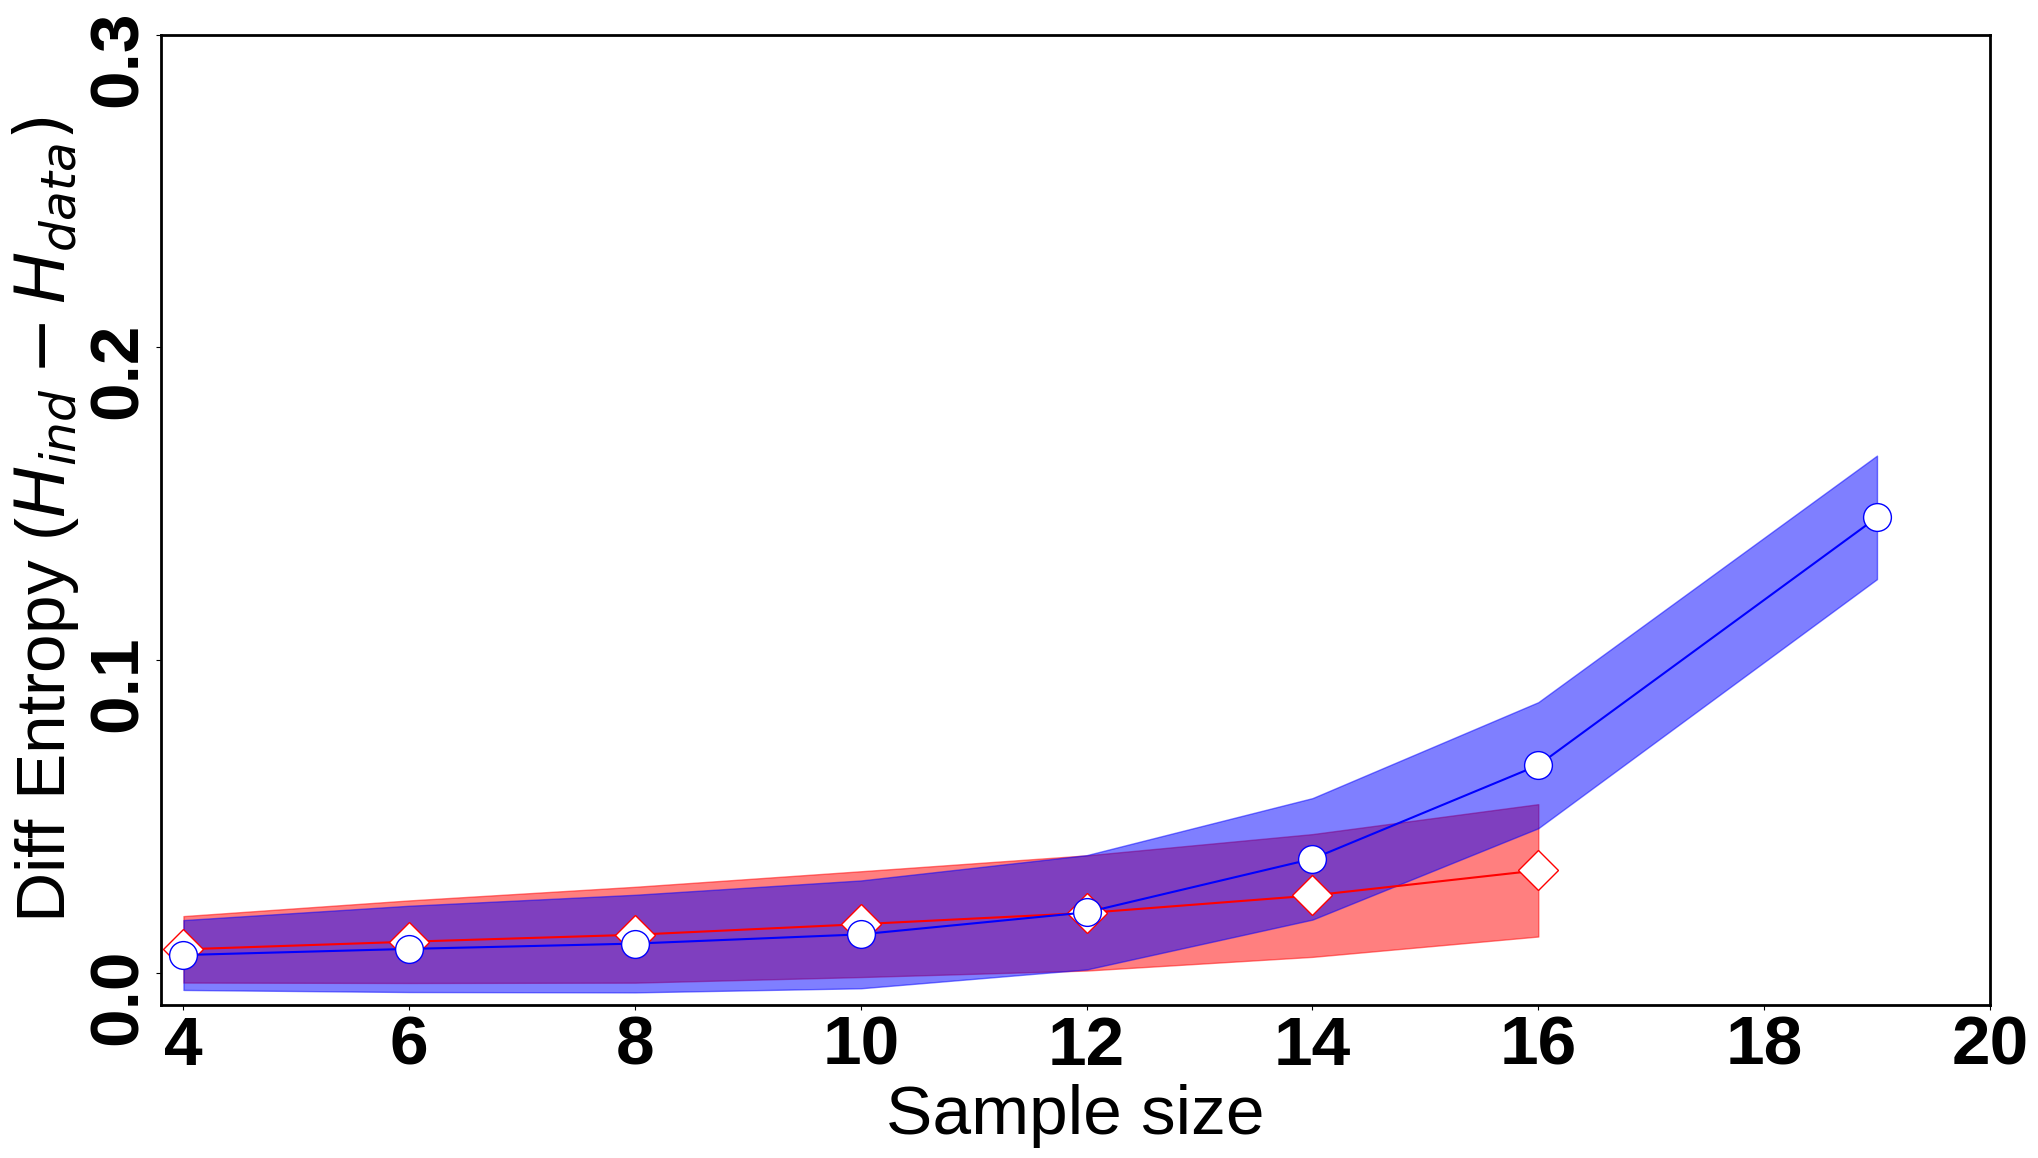

In [15]:
fig, ax = plt.subplots()
figname='../figures/PAIR-DATA-diff_entopy_'+str(case)+'ms.pdf'


clr='r'
ax.plot(df.query('loc=="CA1"')['sample_nums'],df.query('loc=="CA1"')['mean'],
           label='CA1', marker="D", mfc='white',mec='r',ms=mss-30,c=clr)
ax.fill_between(df.query('loc=="CA1"')['sample_nums'], df.query('loc=="CA1"')['upL'], df.query('loc=="CA1"')['dwL'], alpha=0.5,color=clr)

clr='b'
ax.plot(df.query('loc=="SUB"')['sample_nums'],df.query('loc=="SUB"')['mean'], 
                label='SUB',marker='o',mfc='white',mec='b',ms=mss-30,c=clr)
ax.fill_between(df.query('loc=="SUB"')['sample_nums'], df.query('loc=="SUB"')['upL'], df.query('loc=="SUB"')['dwL'], alpha=0.5,color=clr)




ax.xaxis.set_major_locator(MaxNLocator(integer=True))
# ax.set_ylim(0,0.04)
ax.set_ylim(-0.015,0.062)

##For case 40ms
ax.set_ylim(-0.01,0.3)


ax.set_xlim(3.8,20)

ax.tick_params(axis='y',rotation=90,)
               #labelcolor=clr)
# ax.yaxis.label.set_color(clr)
ax.set_xlabel("Sample size", fontsize=fontssize)
ax.set_ylabel("Diff Entropy"+r" ($H_{ind} - H_{data})$",fontsize=fontssize, labelpad=30, ha='center', va='center')  # Adjusted Y-axis label

for tick in ax.get_xticklabels():
    tick.set_fontproperties(ticks_font)
for tick in ax.get_yticklabels():
    tick.set_fontproperties(ticks_font)

# ax_twin = ax.twinx()
# clr='b'
# ax_twin.plot(df.query('loc=="SUB"')['sample_nums'],df.query('loc=="SUB"')['mean'], 
#                 label='SUB',marker='o',mfc='white',mec='b',ms=mss-30,c=clr)
# ax_twin.fill_between(df.query('loc=="SUB"')['sample_nums'], df.query('loc=="SUB"')['upL'], df.query('loc=="SUB"')['dwL'], alpha=0.5,color=clr)

# ax_twin.tick_params(axis='y',labelcolor=clr)  
# ax_twin.set_ylim(-0.01,0.062)
# ax_twin.yaxis.label.set_color(clr)
# ax_twin.set_ylabel("Diff Entropy SUB\n"+ r"($H^{SUB}_{ind} - H^{SUB}_{data})$",fontsize=fontssize,labelpad=70, ha='center', va='center')  # Adjusted Y-axis label

# for tick in ax_twin.get_yticklabels():
#     tick.set_fontproperties(ticks_font)



# # Add legend to the scatter plot outside, on the top, with horizontal layout and single column
# ax.legend(loc='upper center', bbox_to_anchor=(0.31, 1.12), ncol=4,fontsize=22)
# ax_twin.legend(loc='upper center', bbox_to_anchor=(0.71, 1.12), ncol=4,fontsize=22)

fig.savefig(figname,bbox_inches='tight',dpi=300)
plt.show()

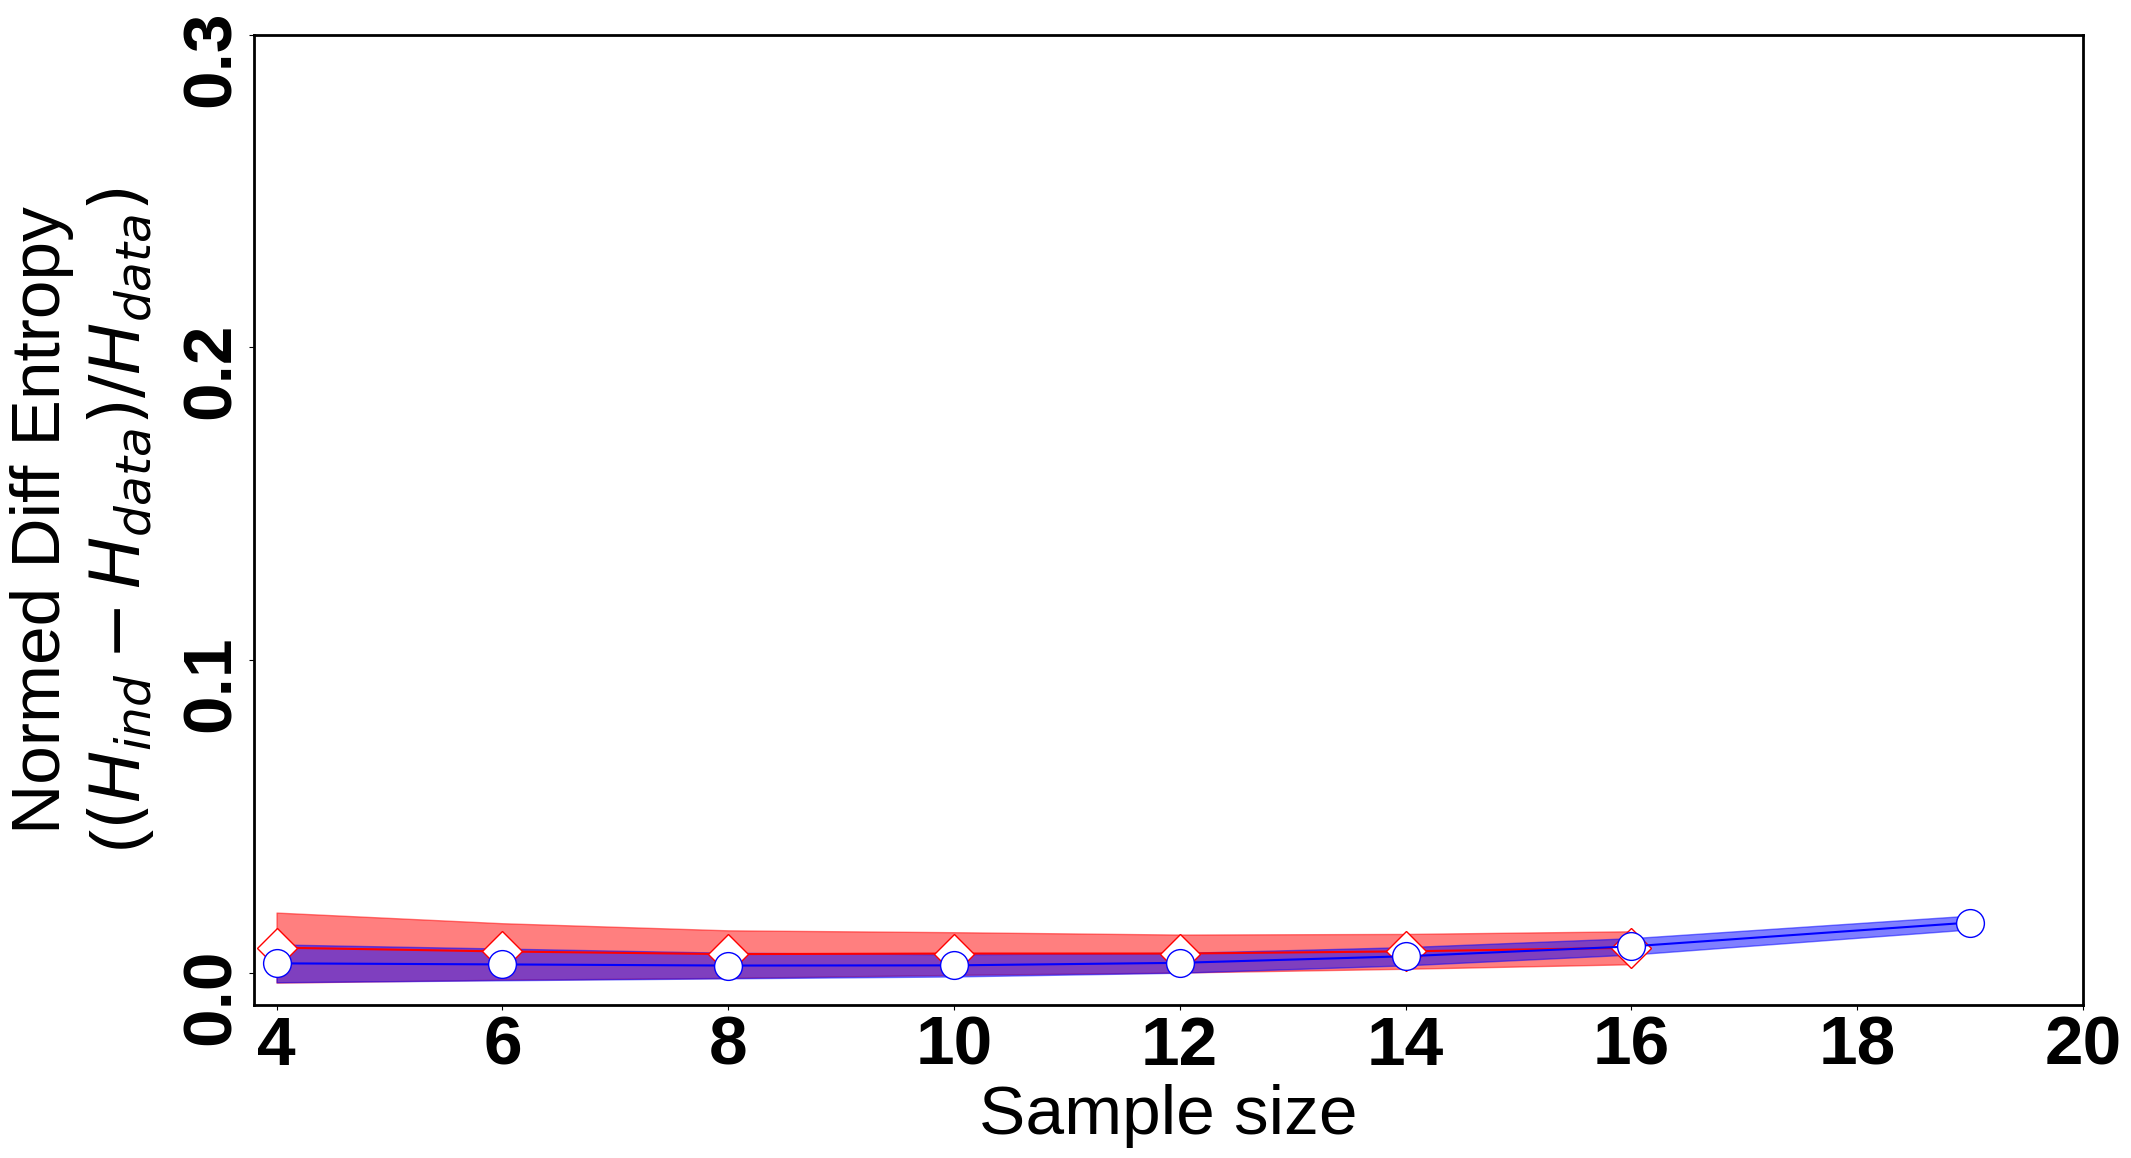

In [16]:
fig, ax = plt.subplots()
figname='../figures/PAIR-DATA-diffnorm_entopy_'+str(case)+'ms.pdf'


clr='r'
ax.plot(df.query('loc=="CA1"')['sample_nums'],df.query('loc=="CA1"')['Nmean'],
           label='CA1', marker="D", mfc='white',mec='r',ms=mss-30,c=clr)
ax.fill_between(df.query('loc=="CA1"')['sample_nums'], df.query('loc=="CA1"')['NupL'], df.query('loc=="CA1"')['NdwL'], alpha=0.5,color=clr)


clr='b'
ax.plot(df.query('loc=="SUB"')['sample_nums'],df.query('loc=="SUB"')['Nmean'], 
                label='SUB',marker='o',mfc='white',mec='b',ms=mss-30,c=clr)
ax.fill_between(df.query('loc=="SUB"')['sample_nums'], df.query('loc=="SUB"')['NupL'], df.query('loc=="SUB"')['NdwL'], alpha=0.5,color=clr)



for tick in ax.get_xticklabels():
    tick.set_fontproperties(ticks_font)
for tick in ax.get_yticklabels():
    tick.set_fontproperties(ticks_font)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
# ax.set_ylim(0,0.04)
# ax.set_ylim(-0.015,0.062)

##For case 40ms
ax.set_ylim(-0.01,0.3)


ax.set_xlim(3.8,20)

ax.tick_params(axis='y',rotation=90,)   
               #labelcolor=clr)
# ax.yaxis.label.set_color(clr)
ax.set_xlabel("Sample size", fontsize=fontssize)
ax.set_ylabel("Normed Diff Entropy\n"+ r"($(H_{ind} - H_{data})/H_{data})$",fontsize=fontssize,labelpad=70, ha='center', va='center')  # Adjusted Y-axis label


# ax_twin = ax.twinx()
# clr='b'
# ax_twin.plot(df.query('loc=="SUB"')['sample_nums'],df.query('loc=="SUB"')['Nmean'], 
#                 label='SUB',marker='o',mfc='white',mec='b',ms=mss-30,c=clr)
# ax_twin.fill_between(df.query('loc=="SUB"')['sample_nums'], df.query('loc=="SUB"')['NupL'], df.query('loc=="SUB"')['NdwL'], alpha=0.5,color=clr)

# ax_twin.tick_params(axis='y',labelcolor=clr)  
# ax_twin.set_ylim(-0.015,0.02)
# ax_twin.yaxis.label.set_color(clr)
# ax_twin.set_ylabel("Normed Diff Entropy SUB\n"+ r"($H^{SUB}_{ind} - H^{SUB}_{data}/H^{SUB}_{data})$",fontsize=fontssize,labelpad=70, ha='center', va='center')  # Adjusted Y-axis label

# for tick in ax_twin.get_yticklabels():
#     tick.set_fontproperties(ticks_font)



# # Add legend to the scatter plot outside, on the top, with horizontal layout and single column
# ax.legend(loc='upper center', bbox_to_anchor=(0.31, 1.12), ncol=4,fontsize=22)
# ax_twin.legend(loc='upper center', bbox_to_anchor=(0.71, 1.12), ncol=4,fontsize=22)

fig.savefig(figname,bbox_inches='tight',dpi=300)
plt.show()